In [2]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
image_w = 128
image_h = 128

X = []
y = []

In [2]:
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
#np_load_old = np.load
#np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)
#np.load = np_load_old

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-8.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])

C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorf

(3639, 128, 128, 3)
3639


In [3]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

In [10]:
import keras
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'
                    ,kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal')) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8-1.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [1]:
import keras
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

Using TensorFlow backend.
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_20\Anaconda3\envs\keras

NameError: name 'K' is not defined

In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Train on 3639 samples, validate on 1214 samples
Epoch 1/50
3639/3639 [==============================] - 13s 3ms/step - loss: 2.4762 - accuracy: 0.3031 - val_loss: 1.7149 - val_accuracy: 0.5206

Epoch 00001: val_loss improved from inf to 1.71491, saving model to ./test/food-8.model
Epoch 2/50
3639/3639 [==============================] - 11s 3ms/step - loss: 1.4677 - accuracy: 0.6131 - val_loss: 1.3237 - val_accuracy: 0.6862

Epoch 00002: val_loss improved from 1.71491 to 1.32374, saving model to ./test/food-8.model
Epoch 3/50
3639/3639 [==============================] - 12s 3ms/step - loss: 1.2442 - accuracy: 0.6873 - val_loss: 1.1578 - val_accuracy: 0.7331

Epoch 00003: val_loss improved from 1.32374 to 1.15781, saving model to ./test/food-8.model
Epoch 4/50
3639/3639 [==============================] - 12s 3ms/step - loss: 1.1121 - accuracy: 0.7367 - val_loss: 1.0780 - val_accuracy: 0.7323

Epoch 00004: val_loss improved from 1.15781 to 1.07801, saving model to ./test/food-8.model
Epoc

In [15]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1214/1214 [==============================] - 1s 1ms/step
정확도 : 0.8460


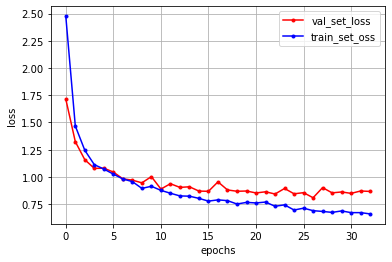

In [16]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [11]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )

image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-8-he_2.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

ResourceExhaustedError: OOM when allocating tensor of shape [256] and type float
	 [[node dense_1_7/Const (defined at C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:649) ]]

Caused by op 'dense_1_7/Const', defined at:
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-15cd801ceda7>", line 24, in <module>
    model = load_model('./test/food-8-he_2.model')
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\saving.py", line 492, in load_wrapper
    return load_function(*args, **kwargs)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\saving.py", line 584, in load_model
    model = _deserialize_model(h5dict, custom_objects, compile)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\saving.py", line 274, in _deserialize_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\saving.py", line 627, in model_from_config
    return deserialize(config, custom_objects=custom_objects)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\layers\__init__.py", line 168, in deserialize
    printable_module_name='layer')
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\utils\generic_utils.py", line 147, in deserialize_keras_object
    list(custom_objects.items())))
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\sequential.py", line 302, in from_config
    model.add(layer)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\sequential.py", line 182, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\base_layer.py", line 463, in __call__
    self.build(unpack_singleton(input_shapes))
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\layers\core.py", line 901, in build
    constraint=self.bias_constraint)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\engine\base_layer.py", line 279, in add_weight
    weight = K.variable(initializer(shape, dtype=dtype),
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\initializers.py", line 38, in __call__
    return K.constant(0, shape=shape, dtype=dtype)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py", line 649, in constant
    value, dtype=dtype, shape=shape, name=name)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\keras\backend.py", line 783, in constant
    return constant_op.constant(value, dtype=dtype, shape=shape, name=name)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\constant_op.py", line 245, in constant
    allow_broadcast=True)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\constant_op.py", line 289, in _constant_impl
    name=name).outputs[0]
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [256] and type float
	 [[node dense_1_7/Const (defined at C:\Users\ICT01_20\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:649) ]]


In [2]:
import keras
from keras.layers import ELU
from keras.layers import BatchNormalization , LeakyReLU
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal')) 
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer='he_normal'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8-he_.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

NameError: name 'K' is not defined

In [6]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 3639 samples, validate on 1214 samples
Epoch 1/50
3639/3639 [==============================] - 14s 4ms/step - loss: 14.8438 - accuracy: 0.1363 - val_loss: 14.8718 - val_accuracy: 0.1343

Epoch 00001: val_loss improved from inf to 14.87181, saving model to ./test/food-8-he_.model
Epoch 2/50
3639/3639 [==============================] - 11s 3ms/step - loss: 14.6669 - accuracy: 0.1401 - val_loss: 14.6784 - val_accuracy: 0.1343

Epoch 00002: val_loss improved from 14.87181 to 14.67844, saving model to ./test/food-8-he_.model
Epoch 3/50
3639/3639 [==============================] - 11s 3ms/step - loss: 14.5159 - accuracy: 0.1396 - val_loss: 14.5297 - val_accuracy: 0.1343

Epoch 00003: val_loss improved from 14.67844 to 14.52975, saving model to ./test/food-8-he_.model
Epoch 4/50
3639/3639 [==============================] - 11s 3ms/step - loss: 14.3911 - accuracy: 0.1390 - val_loss: 14.4106 - val_accuracy: 0.1343

Epoch 00004: val_loss i

Epoch 36/50
3639/3639 [==============================] - 11s 3ms/step - loss: 0.7174 - accuracy: 0.8700 - val_loss: 0.8763 - val_accuracy: 0.8213

Epoch 00036: val_loss did not improve from 0.86703
Epoch 37/50
3639/3639 [==============================] - 11s 3ms/step - loss: 0.7326 - accuracy: 0.8612 - val_loss: 0.9008 - val_accuracy: 0.8056

Epoch 00037: val_loss did not improve from 0.86703
Epoch 38/50
3639/3639 [==============================] - 11s 3ms/step - loss: 0.7438 - accuracy: 0.8706 - val_loss: 0.9042 - val_accuracy: 0.8130

Epoch 00038: val_loss did not improve from 0.86703
Epoch 39/50
3639/3639 [==============================] - 11s 3ms/step - loss: 0.7160 - accuracy: 0.8728 - val_loss: 0.8678 - val_accuracy: 0.8369

Epoch 00039: val_loss did not improve from 0.86703
Epoch 40/50
3639/3639 [==============================] - 11s 3ms/step - loss: 0.6961 - accuracy: 0.8802 - val_loss: 0.8988 - val_accuracy: 0.8048

Epoch 00040: val_loss did not improve from 0.86703
Epoch 41/5

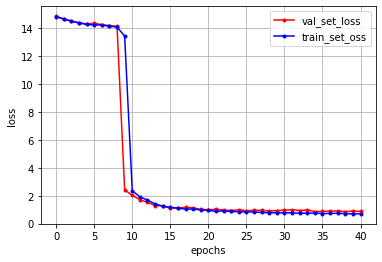

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [3]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )

image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-8-he_.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000]
2
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 고사리나물로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000]
6
[0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000] 해당 이미지는 오징어채볶음로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000]
2
[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 고사리나물로 추정됩니다.


In [4]:
import keras
from keras import layers
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization 
from keras.layers.normalization import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],
                     kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal')) 
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.03))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization() )
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8-he_2.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

NameError: name 'K' is not defined

In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 3639 samples, validate on 1214 samples
Epoch 1/50
3639/3639 [==============================] - 17s 5ms/step - loss: 2.8657 - accuracy: 0.5551 - val_loss: 5.2355 - val_accuracy: 0.1903

Epoch 00001: val_loss improved from inf to 5.23550, saving model to ./test/food-8-he_2.model
Epoch 2/50
3639/3639 [==============================] - 14s 4ms/step - loss: 2.3837 - accuracy: 0.7384 - val_loss: 4.9159 - val_accuracy: 0.2282

Epoch 00002: val_loss improved from 5.23550 to 4.91586, saving model to ./test/food-8-he_2.model
Epoch 3/50
3639/3639 [==============================] - 14s 4ms/step - loss: 2.1619 - accuracy: 0.7909 - val_loss: 3.9571 - val_accuracy: 0.3690

Epoch 00003: val_loss improved from 4.91586 to 3.95707, saving model to ./test/food-8-he_2.model
Epoch 4/50
3639/3639 [==============================] - 14s 4ms/step - loss: 1.9921 - accuracy: 0.8236 - val_loss: 3.2012 - val_accuracy: 0.5206

Epoch 00004: val_loss improved fr

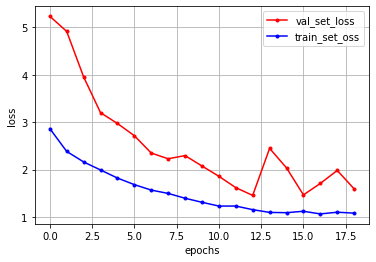

In [6]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [2]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )

image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-8-he_2.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000]
7
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 해당 이미지는 콩자반로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000]
7
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 해당 이미지는 콩자반로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000]
7
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 해당 이미지는 콩자반로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000]
7
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000] 해당 이미지는 콩자반로 추정됩니다.


In [4]:
import keras
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:], activation='relu'
                    ,kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8-last.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 3639 samples, validate on 1214 samples
Epoch 1/50
3639/3639 [==============================] - 13s 3ms/step - loss: 2.4960 - accuracy: 0.2561 - val_loss: 1.9432 - val_accuracy: 0.4456

Epoch 00001: val_loss improved from inf to 1.94318, saving model to ./test/food-8-last.model
Epoch 2/50
3639/3639 [==============================] - 10s 3ms/step - loss: 1.5512 - accuracy: 0.5268 - val_loss: 1.2515 - val_accuracy: 0.6656

Epoch 00002: val_loss improved from 1.94318 to 1.25154, saving model to ./test/food-8-last.model
Epoch 3/50
3639/3639 [==============================] - 10s 3ms/step - loss: 1.1778 - accuracy: 0.6554 - val_loss: 1.0266 - val_accuracy: 0.7216

Epoch 00003: val_loss improved from 1.25154 to 1.02663, saving model to ./test/food-8-last.model
Epoch 4/50
3639/3639 [==============================] - 10s 3ms/step - loss: 1.0869 - accuracy: 0.6919 - val_loss: 1.0860 - val_accuracy: 0.6730

Epoch 00004: val_loss did not imp

In [3]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C:/Users/ICT01_20/Documents/study/test1"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )

image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./test/food-8-last.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

TypeError: Unexpected keyword argument passed to optimizer: learning_rate